# 1. Introduction

Lending Club

# 2. Data Preprocessing

### 2.1 Data Read

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [115]:
df = pd.read_csv("../input/lending-club-loan-dataset/loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
def check_shape(df):
    rows = df.shape[0]
    cols = df.shape[1]
    print(" Number of Records: ",rows)
    print(" Number of Columns: ",cols)

In [86]:
print(df.columns)
print(df.info())
print(df.describe())

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

### 2.3 Missing Value Treatment

In [117]:
# Let's see the missing value counts across columns
print(df.isna().sum())
check_shape(df)

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            866007
total_rev_hi_lim     70276
inq_fi              866007
total_cu_tl         866007
inq_last_12m        866007
Length: 74, dtype: int64
 Number of Records:  887379
 Number of Columns:  74


In [118]:
df_null = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null.rename(columns={'index':'Column'},inplace=True)

In [119]:
#df_null.sort_values(by='% Null',ascending=False)['% Null']>=30
drop_cols = df_null[df_null['% Null']>=20].sort_values(by='% Null',ascending=False)['Column'].tolist()
drop_cols

['annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'il_util',
 'mths_since_rcnt_il',
 'open_il_24m',
 'total_bal_il',
 'total_cu_tl',
 'inq_fi',
 'all_util',
 'max_bal_bc',
 'open_rv_24m',
 'open_rv_12m',
 'inq_last_12m',
 'open_il_12m',
 'open_il_6m',
 'open_acc_6m',
 'desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'mths_since_last_delinq',
 'next_pymnt_d']

In [120]:
df.drop(labels=drop_cols,axis=1, inplace=True)

In [121]:
df_null2 = pd.DataFrame(round((df.isna().sum()/df.shape[0])*100,2),columns=['% Null']).reset_index()
df_null2.rename(columns={'index':'Column'},inplace=True)
df_null2.sort_values(by='% Null',ascending=False)
check_shape(df)

 Number of Records:  887379
 Number of Columns:  52


In [122]:
# dropping rows where missing values
df.dropna(axis=0, inplace=True)
check_shape(df)

 Number of Records:  752938
 Number of Columns:  52


In [123]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
42535,10149342,12000897,27050,27050,27050.0,36 months,10.99,885.46,B,B2,...,Jan-16,885.46,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,114834.0,59900.0
42536,10159584,12011200,9750,9750,9750.0,36 months,13.98,333.14,C,C1,...,Jan-16,333.14,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,14123.0,15100.0
42537,10159498,1319523,12000,12000,12000.0,36 months,6.62,368.45,A,A2,...,Jan-16,368.45,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,267646.0,61100.0
42538,10139658,11991209,12000,12000,12000.0,36 months,13.53,407.40,B,B5,...,Sep-15,119.17,Jan-16,0.0,1,INDIVIDUAL,0.0,15386.0,13605.0,8100.0
42539,10159548,12011167,15000,15000,15000.0,36 months,8.90,476.30,A,A5,...,Jan-16,476.30,Jan-16,0.0,1,INDIVIDUAL,0.0,1514.0,272492.0,15400.0


In [124]:
numeric_cols = df.select_dtypes(['int','float']).columns.tolist()
numeric_cols

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [125]:
obje_cols = df.select_dtypes(np.object).columns.tolist()
obje_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [126]:
df_num = df[numeric_cols[:16]]
df_num.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
count,7.529380e+05,7.529380e+05,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,7.529380e+05,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,7.529380e+05,752938.000000,752938.00000
mean,3.452995e+07,3.722536e+07,15156.353312,15156.345708,15150.010022,13.312015,447.374249,7.674135e+04,18.386580,0.331504,0.671420,11.778436,0.200299,1.728738e+04,55.556253,25.59931
std,2.141703e+07,2.253547e+07,8443.923126,8443.923526,8440.630553,4.411928,244.102988,6.592753e+04,8.286554,0.888108,0.959545,5.359415,0.593268,2.270638e+04,23.442118,11.85340
min,5.670500e+04,7.082500e+04,1000.000000,1000.000000,925.000000,5.320000,23.260000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,2.00000
25%,1.264568e+07,1.457781e+07,8800.000000,8800.000000,8800.000000,9.990000,269.980000,4.750000e+04,12.160000,0.000000,0.000000,8.000000,0.000000,6.691000e+03,38.400000,17.00000
50%,3.817114e+07,4.094535e+07,14000.000000,14000.000000,14000.000000,12.990000,392.810000,6.500000e+04,17.890000,0.000000,0.000000,11.000000,0.000000,1.218000e+04,56.400000,24.00000
75%,5.515089e+07,5.872080e+07,20000.000000,20000.000000,20000.000000,16.290000,585.117500,9.100000e+04,24.250000,0.000000,1.000000,15.000000,0.000000,2.126500e+04,73.700000,32.00000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,380.530000,39.000000,8.000000,90.000000,86.000000,2.904836e+06,892.300000,169.00000


In [127]:
df_num = df[numeric_cols[16:]]
df_num.describe()

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.0,752938.000000,7.529380e+05,7.529380e+05,7.529380e+05
mean,9091.243933,9087.654092,7327.321646,7324.047924,5541.790534,1744.915657,0.329850,40.285607,4.309378,2188.976002,0.015465,1.0,0.005448,2.212812e+02,1.418004e+05,3.216146e+04
std,8491.856233,8488.419806,7604.631877,7600.823287,6477.238454,2019.064305,3.737527,373.316613,53.085125,4890.464820,0.139431,0.0,0.081243,1.072247e+04,1.546332e+05,3.779435e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,926.872500,926.512500,1933.797500,1933.365000,1208.057500,461.560000,0.000000,0.000000,0.000000,298.170000,0.000000,1.0,0.000000,0.000000e+00,3.094725e+04,1.410000e+04
50%,7542.860000,7537.530000,4705.780000,4704.610000,3049.170000,1087.355000,0.000000,0.000000,0.000000,471.370000,0.000000,1.0,0.000000,0.000000e+00,8.354700e+04,2.390000e+04
75%,14337.010000,14328.622500,10180.160000,10175.297500,7370.457500,2234.330000,0.000000,0.000000,0.000000,808.540000,0.000000,1.0,0.000000,0.000000e+00,2.114110e+05,3.990000e+04
max,49372.860000,49372.860000,56087.909920,56047.850000,35000.000000,21840.000000,358.680000,33520.270000,5694.093600,36475.590000,20.000000,1.0,14.000000,9.152545e+06,8.000078e+06,9.999999e+06


In [128]:
l = ['id','member_id','dti','delinq_2yrs','inq_last_6mths','pub_rec','policy_code','recoveries','collection_recovery_fee','total_rec_late_fee','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt']
num_cols = numeric_cols
for x in l:
    num_cols.remove(x)

In [129]:
len(num_cols)

19

In [130]:
num_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_pymnt_amnt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [131]:
def plot_box(cols_list):
    plt.figure(figsize=[20,20])
    i=1
    for col in cols_list:
        plt.subplot(5,5,i)
        sns.boxplot(df[col],orient='h')
        plt.title("Box plot for {}".format(col))
        i+=1
        plt.tight_layout()
    plt.show()

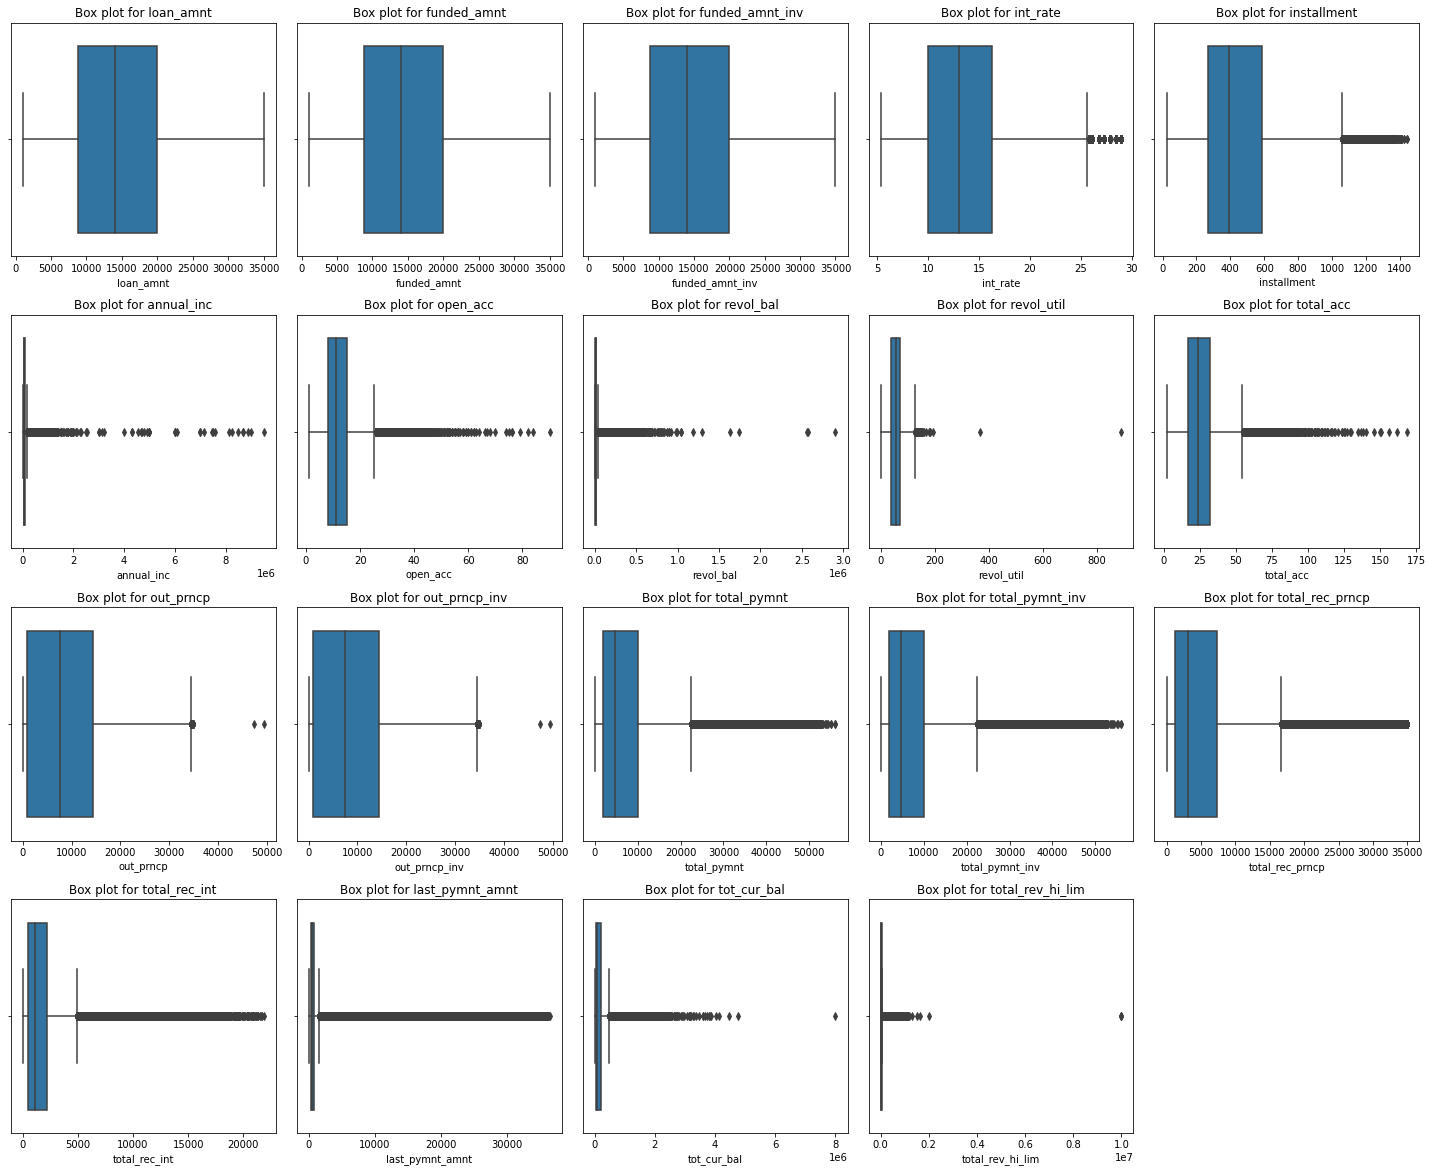

In [132]:
plot_box(num_cols)

# 2.2 Univariate Analysis

In [133]:
def plot_dist(cols_list):
    plt.figure(figsize=[20,20])
    i=1
    for col in cols_list:
        plt.subplot(5,5,i)
        sns.distplot(df[col])
        plt.title("Box plot for {}".format(col))
        i+=1
        plt.tight_layout()
    plt.show()

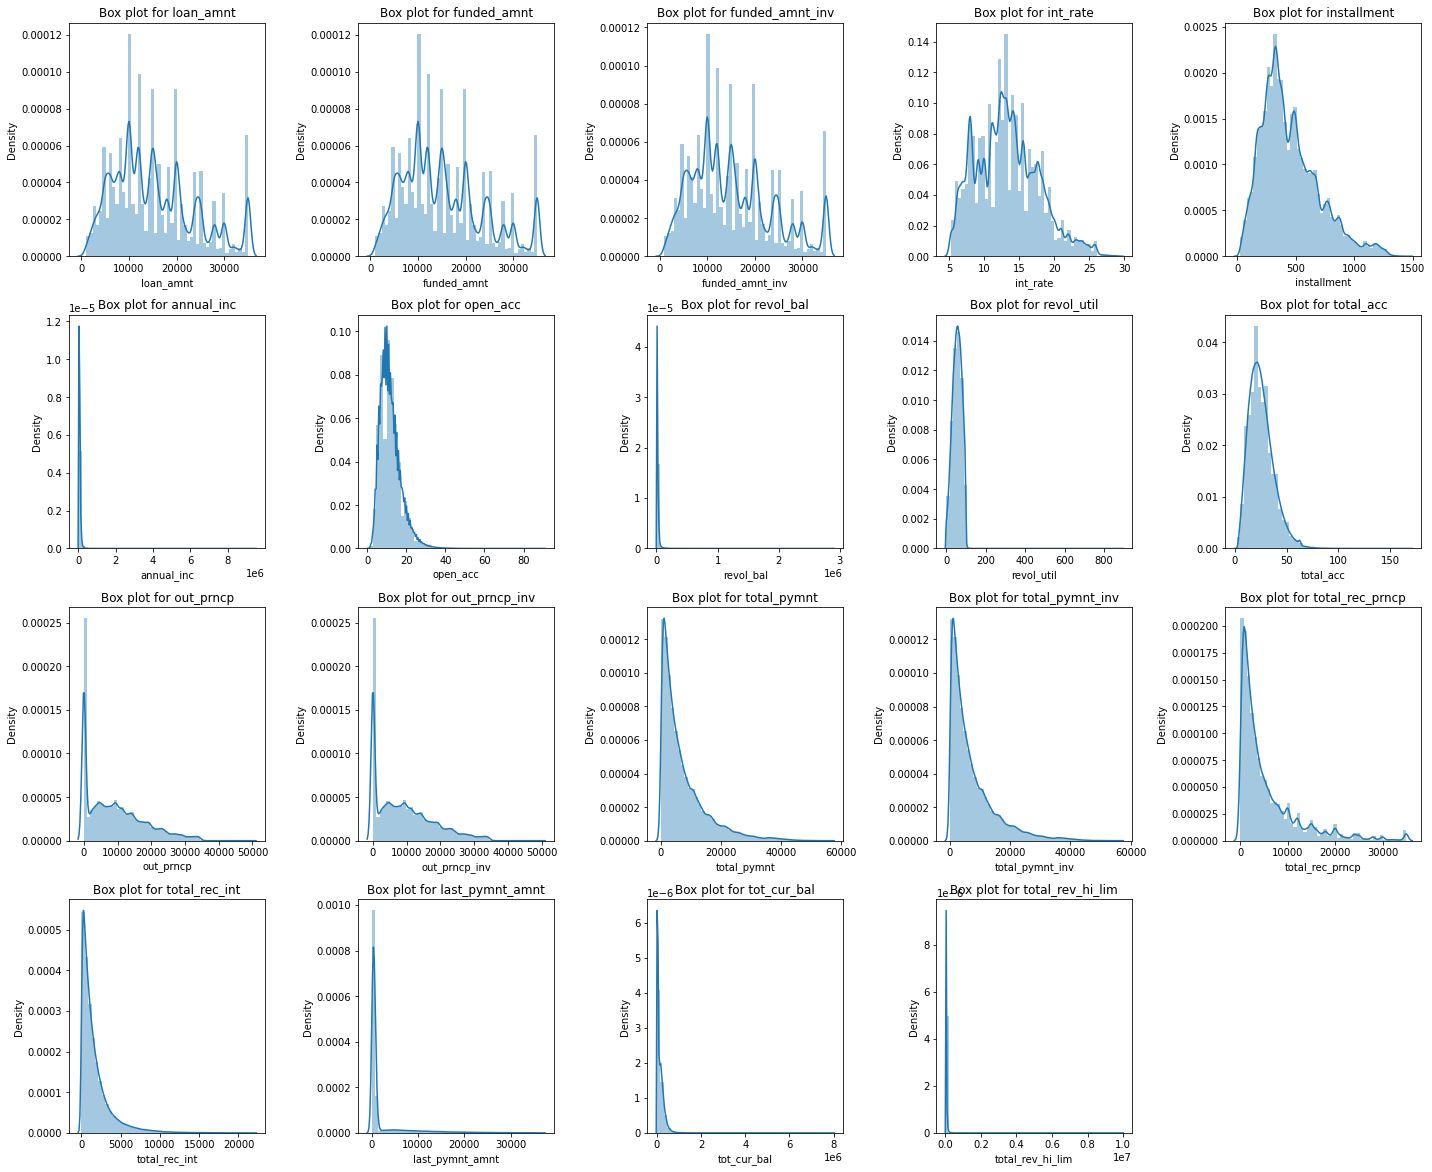

In [134]:
plot_dist(num_cols)

In [135]:
outlier_cols = ['int_rate','installment','open_acc','revol_util','total_acc', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int']

In [136]:
df[outlier_cols].describe()

,int_rate,installment,open_acc,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,752938.000000,752938.000000,752938.000000,752938.000000,752938.00000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000
mean,13.312015,447.374249,11.778436,55.556253,25.59931,9091.243933,9087.654092,7327.321646,7324.047924,5541.790534,1744.915657
std,4.411928,244.102988,5.359415,23.442118,11.85340,8491.856233,8488.419806,7604.631877,7600.823287,6477.238454,2019.064305
min,5.320000,23.260000,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.990000,269.980000,8.000000,38.400000,17.00000,926.872500,926.512500,1933.797500,1933.365000,1208.057500,461.560000
50%,12.990000,392.810000,11.000000,56.400000,24.00000,7542.860000,7537.530000,4705.780000,4704.610000,3049.170000,1087.355000
75%,16.290000,585.117500,15.000000,73.700000,32.00000,14337.010000,14328.622500,10180.160000,10175.297500,7370.457500,2234.330000
max,28.990000,1445.460000,90.000000,892.300000,169.00000,49372.860000,49372.860000,56087.909920,56047.850000,35000.000000,21840.000000


In [137]:
cols = outlier_cols
#quantiles = np.arange(0.9,1.0,0.01)
quantiles = [0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
df_out = pd.DataFrame(columns=quantiles,index=outlier_cols)

In [138]:
cols = outlier_cols
quantiles = [0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
for col in outlier_cols:
    for q in quantiles:
        df_out.loc[col][q]=round(df[col].quantile(q),4)
        
df_out['Max'] = df[outlier_cols].apply(max)
df_out

,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,Max
int_rate,19.05,19.24,19.52,19.99,20.49,21.0,21.99,22.95,23.83,24.99,28.99000
installment,789.583,809.93,838.36,861.81,882.47,918.31,961.54,1020.39,1103.09,1185.2,1445.46000
open_acc,19.0,19.0,20.0,20.0,21.0,22.0,23.0,24.0,26.0,29.0,90.00000
revol_util,86.7,87.8,88.9,90.0,91.2,92.5,93.8,95.2,96.7,98.5,892.30000
total_acc,41.0,42.0,43.0,45.0,46.0,47.0,49.0,52.0,55.0,61.0,169.00000
out_prncp,21590.33,22335.73,23064.93,23742.12,24663.01,25948.4715,27273.63,28662.3052,30423.4726,32648.05,49372.86000
out_prncp_inv,21584.73,22328.61,23060.11,23732.06,24653.179,25940.3585,27256.91,28646.0309,30411.26,32631.29,49372.86000
total_pymnt,17574.622,18492.81,19554.0068,20693.6,21845.8086,23212.0012,25077.0216,27232.9743,30517.0103,35878.6853,56087.90992
total_pymnt_inv,17562.479,18482.42,19539.6572,20679.8246,21836.16,23199.18,25064.1724,27217.25,30508.1964,35867.6635,56047.85000
total_rec_prncp,14425.0,15000.0,16000.0,17000.0,18186.6916,20000.0,21000.0,24000.0,25975.0,30000.0,35000.00000


In [109]:
df_out.columns

Index([0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 'Max'], dtype='object')

### We can select the data at 98th percentile as the values seems to be shot up and could be potential outliers

In [110]:
#df[outlier_cols] = df[outlier_cols].quantile(q=0.99)

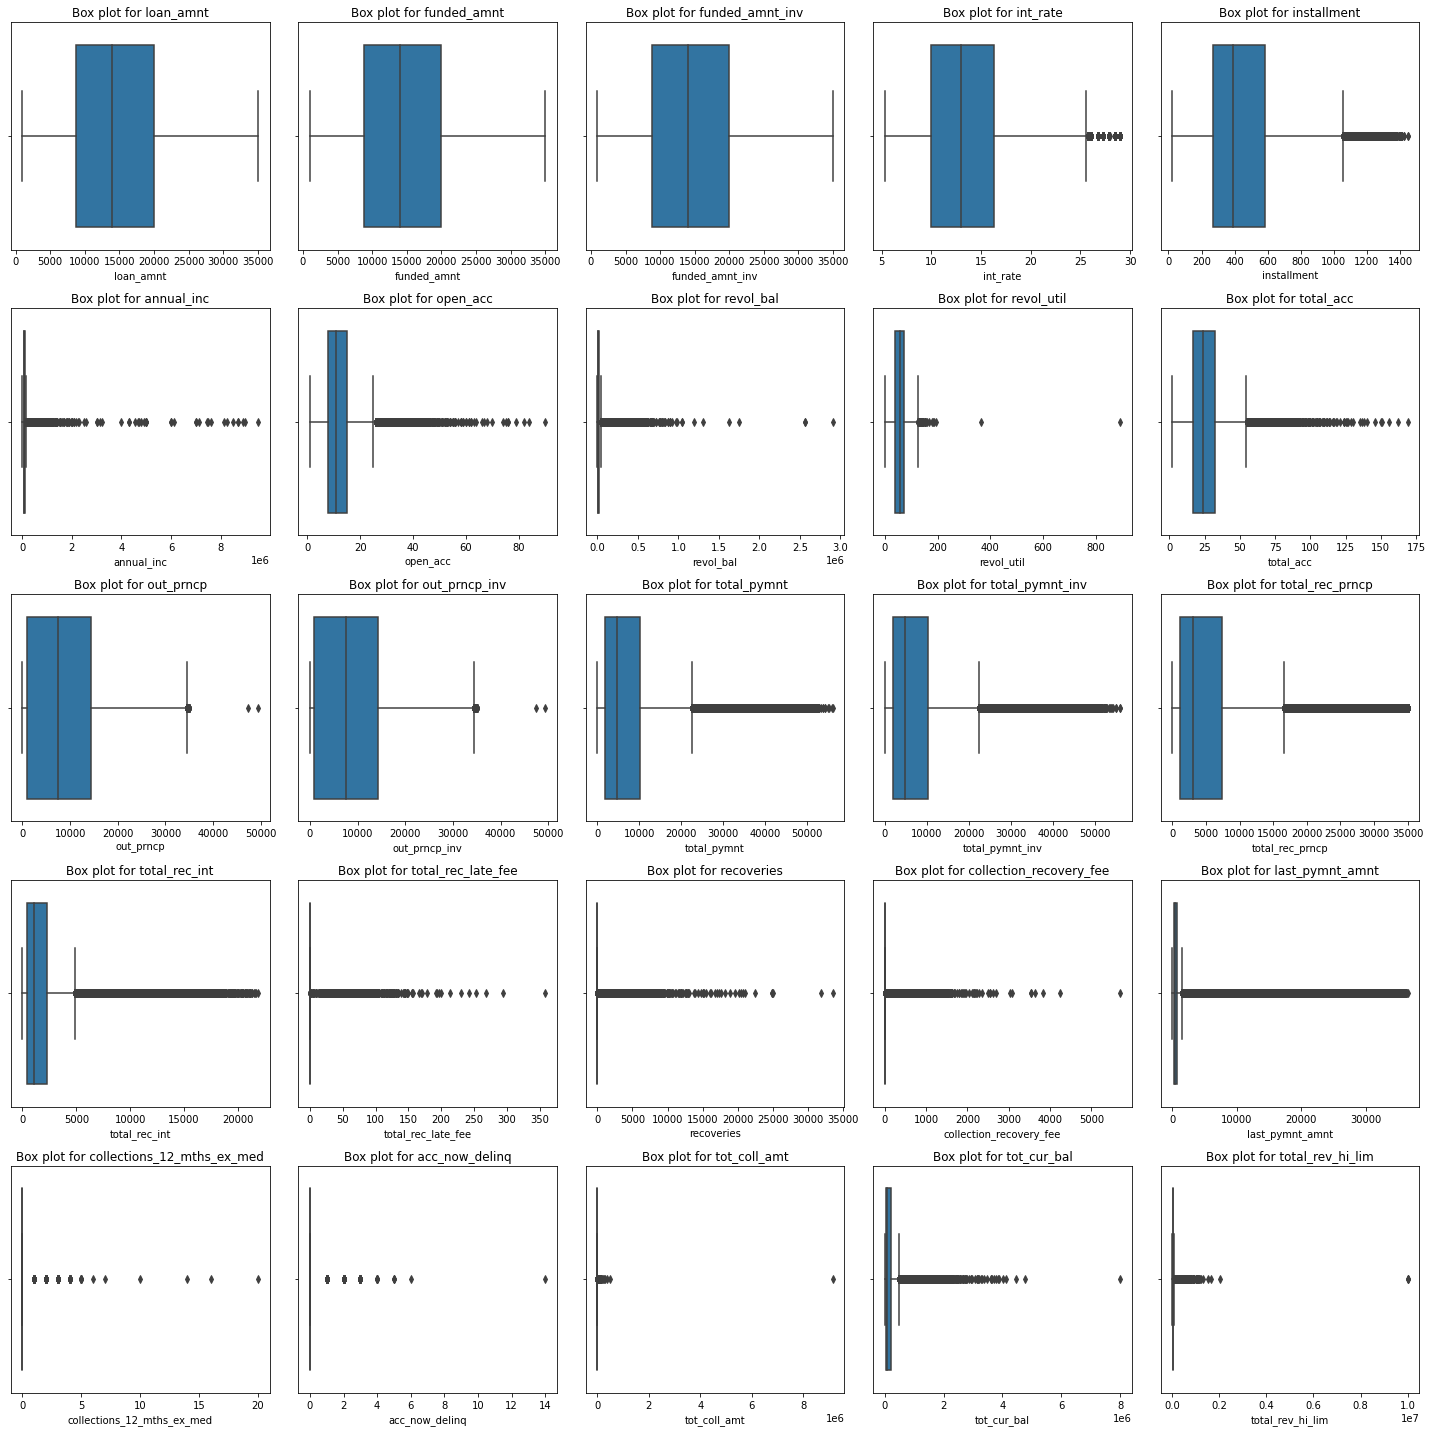

In [111]:
plot_box(num_cols)

In [112]:
outlier_cols

['int_rate',
 'installment',
 'open_acc',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int']

In [113]:
df[outlier_cols].quantile(q=0.89)

int_rate              18.840000
installment          773.180000
open_acc              18.000000
revol_util            85.700000
total_acc             41.000000
out_prncp          20801.132300
out_prncp_inv      20794.250000
total_pymnt        16826.898005
total_pymnt_inv    16819.785800
total_rec_prncp    13576.130000
total_rec_int       3848.617900
Name: 0.89, dtype: float64

In [114]:
df[outlier_cols].describe()

,int_rate,installment,open_acc,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
count,752938.000000,752938.000000,752938.000000,752938.000000,752938.00000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000,752938.000000
mean,13.312015,447.374249,11.778436,55.556253,25.59931,9091.243933,9087.654092,7327.321646,7324.047924,5541.790534,1744.915657
std,4.411928,244.102988,5.359415,23.442118,11.85340,8491.856233,8488.419806,7604.631877,7600.823287,6477.238454,2019.064305
min,5.320000,23.260000,1.000000,0.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.990000,269.980000,8.000000,38.400000,17.00000,926.872500,926.512500,1933.797500,1933.365000,1208.057500,461.560000
50%,12.990000,392.810000,11.000000,56.400000,24.00000,7542.860000,7537.530000,4705.780000,4704.610000,3049.170000,1087.355000
75%,16.290000,585.117500,15.000000,73.700000,32.00000,14337.010000,14328.622500,10180.160000,10175.297500,7370.457500,2234.330000
max,28.990000,1445.460000,90.000000,892.300000,169.00000,49372.860000,49372.860000,56087.909920,56047.850000,35000.000000,21840.000000
